# A Whale Off the Port(folio)

### Import libraries and dependencies

In [104]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

## Data Cleaning

### 1. Whale Returns

#### Read the CSV into a DataFrame using Pandas  

In [105]:
# Reading whale returns and set the `date` as the index

whale_path = Path("whale_returns.csv")
whale_returns = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sorting the date index in ascending order

whale_returns.sort_index(ascending = True, inplace = True)

# Display sample data
whale_returns.head(10)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


#### Checking for nulls

In [106]:
# Check for null values

whale_returns.isnull()

# Display sample data
whale_returns.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


#### Determining the percentage of nulls

In [107]:
# Determine percentage of nulls

whale_returns.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

#### Determining the number of nulls

In [108]:
# Determine number of nulls

whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

#### Cleanse data by dropping nulls

In [109]:
# Cleaning nulls from DataFrame by dropping

whale_returns = whale_returns.dropna().copy()

# Display sample data

whale_returns.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142


#### Checking number of nulls again

In [110]:
 whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

### 2. Algorithmic Daily Returns

#### Read the CSV into a DataFrame using Pandas 

In [111]:
# Reading Algorithmic Daily returns

algo_path = Path("algo_returns.csv")
algo_returns = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sorting the date index in ascending order

algo_returns.sort_index(ascending = True, inplace = True)

# Display sample data

algo_returns.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


#### Checking for nulls

In [112]:
# Check for null values

algo_returns.isnull()

# Display sample data

algo_returns.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


#### Determining the percentage of nulls

In [113]:
# Determine percentage of nulls

algo_returns.isnull().mean() * 100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

#### Determining the number of nulls

In [114]:
# Determine number of nulls

algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

#### Cleanse data by dropping nulls

In [115]:
# Cleaning nulls from DataFrame by dropping

algo_returns = algo_returns.dropna().copy()

# Display sample data

algo_returns.head(10)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
2014-06-12,-0.000028,-0.003841
2014-06-13,0.001917,-0.000814
2014-06-16,0.001084,0.001831
2014-06-17,0.000922,0.006870


#### Checking number of nulls again

In [116]:
 algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

### 3. S&P TSX 60 Returns

#### Read the CSV into a DataFrame using Pandas  

In [117]:
 # Reading S&P TSX 60 Closing Prices

sp_tsx_path = Path("sp_tsx_history.csv")
sp_tsx_data = pd.read_csv(sp_tsx_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sorting the date index in ascending order

sp_tsx_data.sort_index(ascending = True, inplace = True)

# Display sample data
sp_tsx_data.head(10)


,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
2012-10-09,"$12,273.57"
2012-10-10,"$12,212.42"
2012-10-11,"$12,233.95"
2012-10-12,"$12,202.04"


####  Identify DataFrame Data Types

In [118]:
# Check Data Types
 
sp_tsx_data.dtypes

Close    object
dtype: object

#### Fix Data Types

In [119]:
 # Fix Data Types

sp_tsx_data["Close"] = sp_tsx_data["Close"].str.replace("$", "")
sp_tsx_data["Close"] = sp_tsx_data["Close"].str.replace(",", "")
sp_tsx_data["Close"] = sp_tsx_data["Close"].astype("float")

# Display sample data

sp_tsx_data.head(10)

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
2012-10-09,12273.57
2012-10-10,12212.42
2012-10-11,12233.95
2012-10-12,12202.04


#### Calculate Daily Returns

In [120]:
# Calculate Daily Returns

sp_tsx_daily_returns = sp_tsx_data.pct_change()
sp_tsx_daily_returns.head(10)

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
2012-10-10,-0.004982
2012-10-11,0.001763
2012-10-12,-0.002608


In [121]:
# Determine number of nulls

sp_tsx_daily_returns.isnull().sum()

Close    1
dtype: int64

#### Cleanse data by dropping nulls

In [122]:
# Cleaning nulls from DataFrame by dropping

sp_tsx_daily_returns.dropna(inplace = True)
sp_tsx_daily_returns.head(10)

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
2012-10-10,-0.004982
2012-10-11,0.001763
2012-10-12,-0.002608
2012-10-15,0.002288


#### Checking number of nulls again

In [123]:
sp_tsx_daily_returns.isnull().sum()

Close    0
dtype: int64

#### Renaming 'Close' column to 'Daily Returns'

In [124]:
# Rename `Close` Column to be specific to this portfolio.

sp_tsx_daily_returns.rename(columns = {"Close":"SP Returns"}, inplace = True)

sp_tsx_daily_returns.head(10)


,SP Returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
2012-10-10,-0.004982
2012-10-11,0.001763
2012-10-12,-0.002608
2012-10-15,0.002288


####  Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [125]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

df_daily_returns = pd.concat([whale_returns, algo_returns,sp_tsx_daily_returns], axis = "columns",join = "inner")

# Display sample data

df_daily_returns.head(20)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.014321
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,0.006655
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.002139
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.002655


### Conduct Quantitative Analysis

#### Performance Anlysis

##### Calculate and Plot the daily returns.

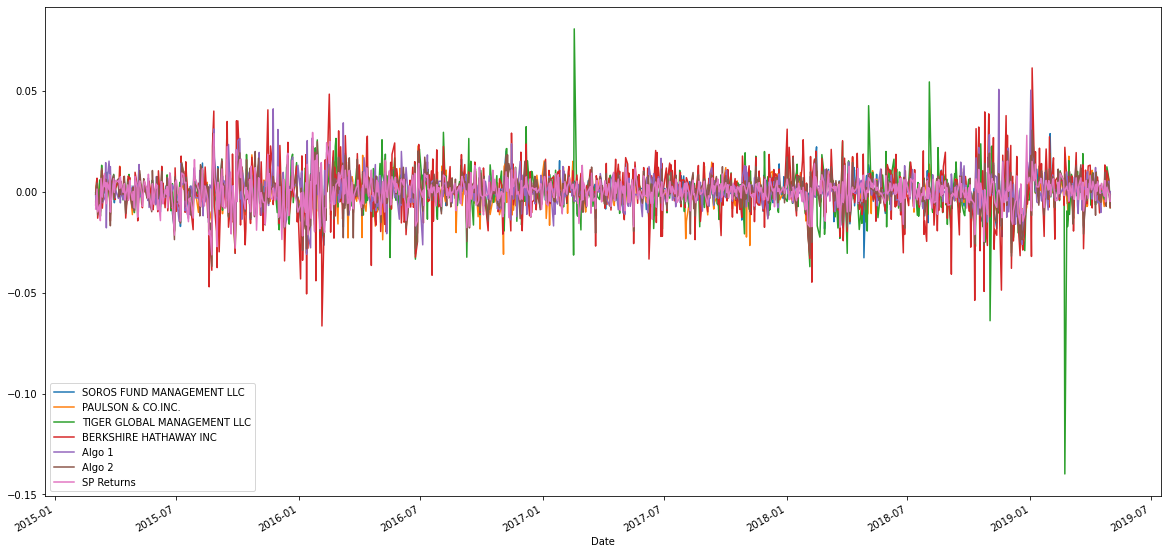

In [126]:
# Plot daily returns of all portfolios

df_daily_returns.plot(figsize = (20,10))

###### It seems TIGER GLOBAL MANAGEMENT LLC has some one day volatility and so does BERKSHIRE HATHWAY INC.

##### Calculate and Plot cumulative returns.

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2019-04-25                   1.118163            0.754821   
2019-04-26                   1.127275            0.761736   
2019-04-29                   1.128689            0.763808   
2019-04-30                   1.127228            0.762119   
2019-05-01                   1.120637            0.761096   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2019-04-25                     0.840272                1.348932  2.011144   
2019-04-26                     0.850654                1.363007  2.017139   
2019-04-29                     0.855971                1.370126  2.027645   
2019-04-30                     0.855749                1.365054  2.021675   
2019-05-01                     0.848958                1.354361  2.021865   

              Algo 2  SP Returns

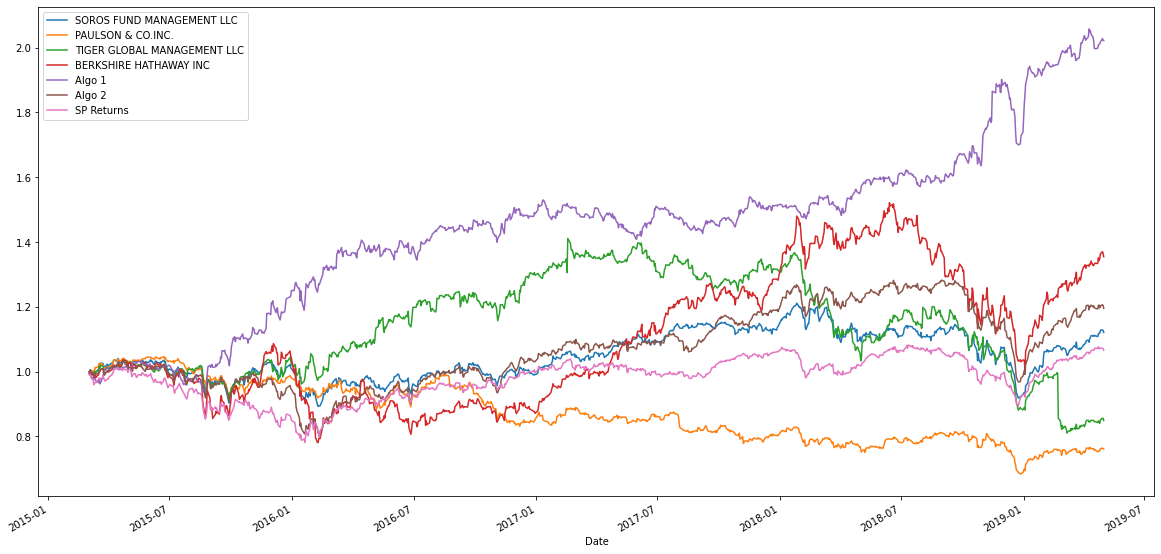

In [127]:
# Calculate cumulative returns of all portfolios

df_cum_returns = (1+ df_daily_returns).cumprod()

# Plot cumulative returns

df_cum_returns.plot(figsize = (20,10))

print(df_cum_returns.tail())

###### Algo 1's return is leading followed by BERKSHIRE HATHWAY INC.

####  Risk Analysis

#####  Create a box plot for each portfolio

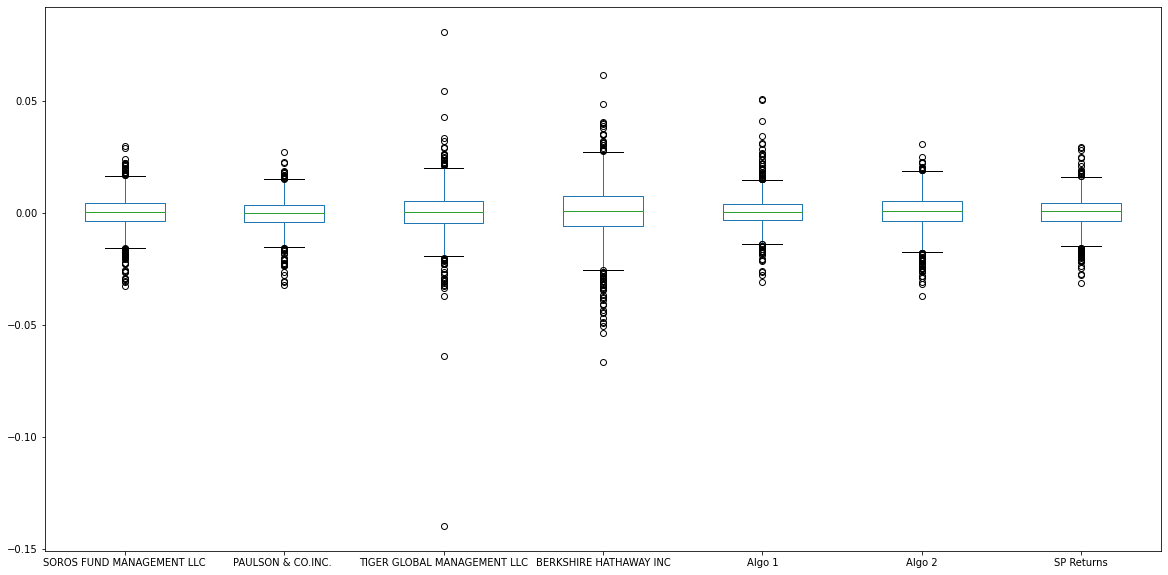

In [128]:
# Box plot to visually show risk

df_daily_returns.plot(kind = "box", figsize = (20,10))

#####  Calculate Standard Deviations

In [129]:
# Calculate the daily standard deviations of all portfolios

df_daily_std = pd.DataFrame(df_daily_returns.std()).rename(columns = {0:"std"})
df_daily_std

,std
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
SP Returns,0.007034


#####  Determine which portfolios are riskier than the S&P TSX 60

In [130]:
# Determine which portfolios are riskier than the S&P TSX 60

higher_std = df_daily_std[df_daily_std["std"] > df_daily_std.loc["SP Returns", "std"]]
higher_std


,std
SOROS FUND MANAGEMENT LLC,0.007828
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326


##### Calculate the Annualized Standard Deviation

In [131]:
# Calculate the annualized standard deviation (252 trading days)

df_annualized_std = df_daily_std*np.sqrt(252)
df_annualized_std

,std
SOROS FUND MANAGEMENT LLC,0.124259
PAULSON & CO.INC.,0.110841
TIGER GLOBAL MANAGEMENT LLC,0.172759
BERKSHIRE HATHAWAY INC,0.203599
Algo 1,0.120470
Algo 2,0.132177
SP Returns,0.111664


#### Rolling Statistics

#####  Calculate and plot rolling std for all portfolios with 21-day window

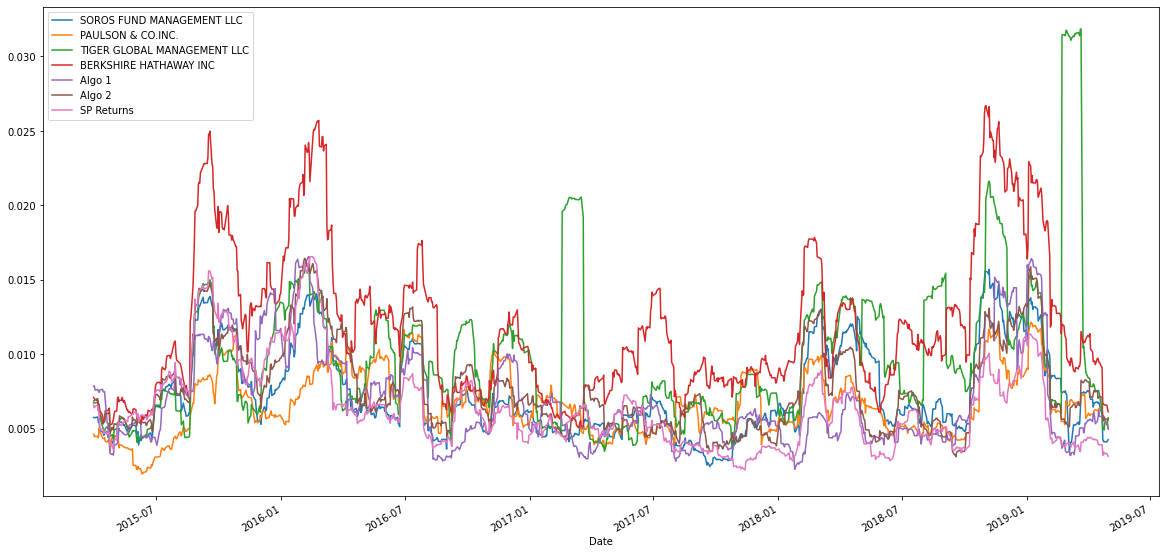

In [132]:
# Calculate and Plot the rolling standard deviation for all portfolios using a 21-day window

df_daily_returns.rolling(window=21).std().plot(figsize=(20,10))


##### Calculate and plot the correlation

In [133]:
# Calculate the correlation

correlation = df_daily_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
SP Returns,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


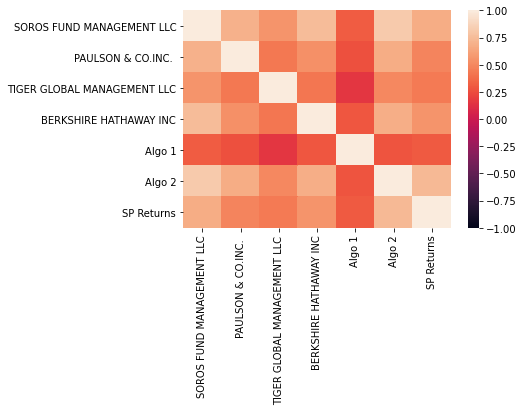

In [134]:
# Display de correlation matrix

import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1,)

##### Algo 2 best mimic the S&P TSX 60; since it has the best correlation to S&P TSX 60 as shown.

In [135]:
correlation_SP = pd.DataFrame(df_daily_returns.corr()).loc[:,"SP Returns"]
correlation_SP[correlation_SP==correlation_SP[correlation_SP<1].max()]

Algo 2    0.73737
Name: SP Returns, dtype: float64

#####  Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [136]:
# Calculate covariance of a single portfolio

covariance = df_daily_returns['BERKSHIRE HATHAWAY INC'].cov(df_daily_returns['SP Returns'])
covariance


5.027336077110027e-05

In [137]:

# Calculate variance of S&P TSX

variance = df_daily_returns['SP Returns'].var()
variance

4.9479515915131015e-05

In [138]:
# Computing beta

BH_beta = covariance / variance
BH_beta

1.016043909106364

In [140]:
rolling_covariance = df_daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(df_daily_returns['SP Returns'])
rolling_variance = df_daily_returns['SP Returns'].rolling(window=60).var()

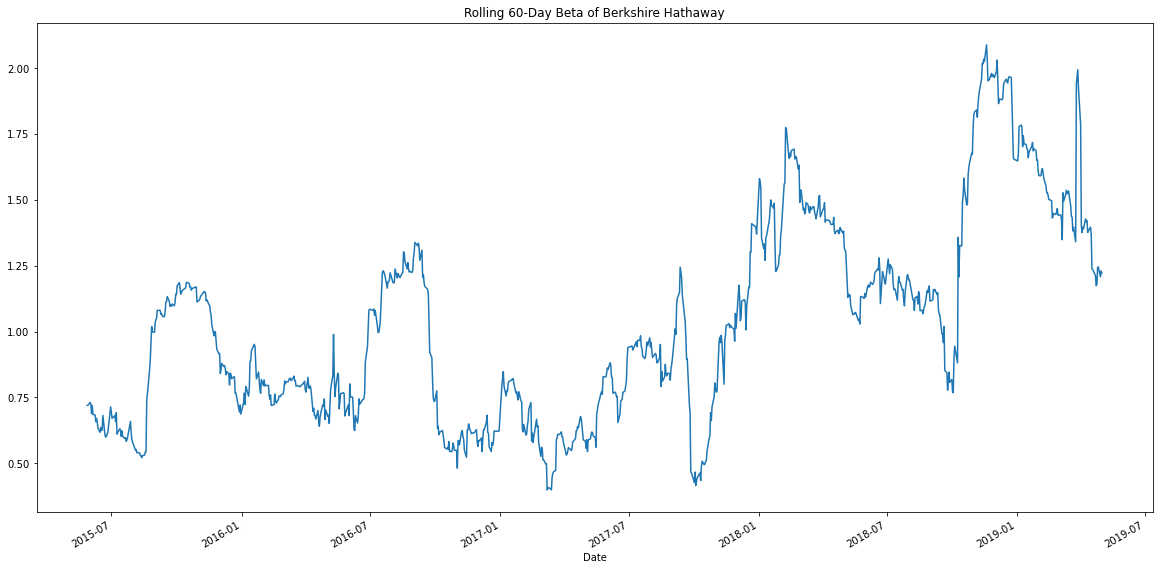

In [141]:
rolling_beta = rolling_covariance / rolling_variance

# Plot beta trend

rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Berkshire Hathaway')

#### Rolling Statistics Challenge: Exponentially Weighted Average

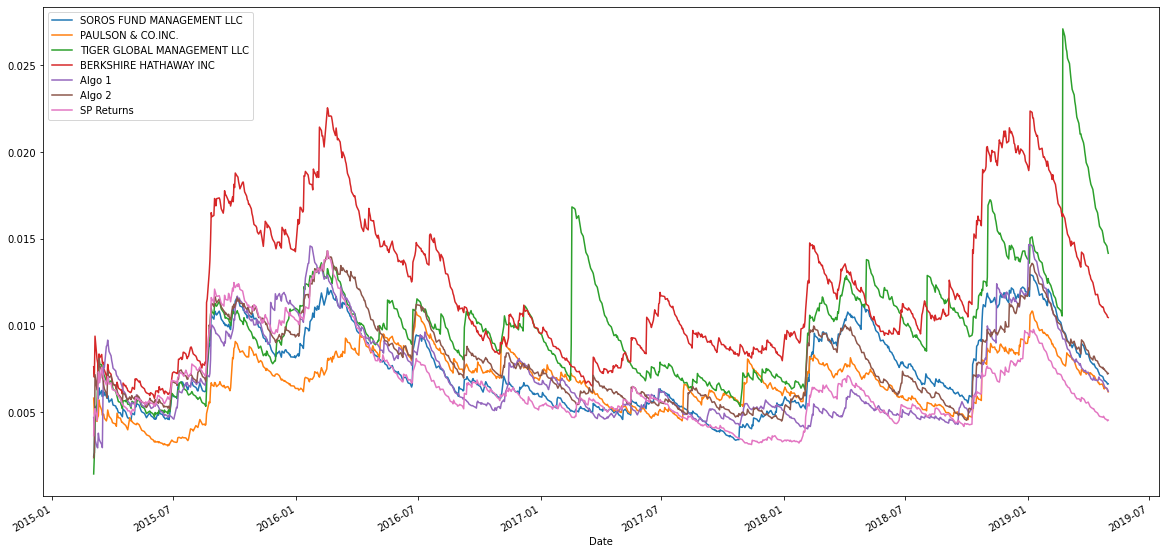

In [142]:
# Use `ewm` to calculate the rolling window

df_daily_returns.ewm(halflife=21).std().plot(figsize=(20,10))


### Sharpe Ratios

##### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [143]:
# Annualized Sharpe Ratios

sharpe_ratios = df_daily_returns.mean()*252/(df_daily_returns.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
SP Returns                     0.195550
dtype: float64

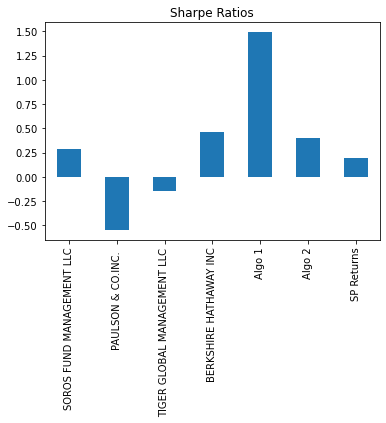

In [144]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

##### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

##### Algo 1 outperformed both the S&P TSX 60 and whale portfolios whereas Algo 2 fell below BERKSHIRE HATHAWAY INC.

# Create Custom Portfolio

In [145]:
# Reading data from 1st stock and set the `date` as the index

shop_path = Path("shop_historical.csv")
shop_historical = pd.read_csv(shop_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sorting the date index in ascending order

shop_historical.sort_index(ascending = True, inplace = True)

# Rename `Close` Column to be specific to this portfolio.

shop_historical.rename(columns={"Symbol": "Shop","Close":"SHOP"}, inplace = True)


shop_historical.drop(columns=['Shop'], axis=1, inplace = True)

# Display sample data

shop_historical.head(10)



,SHOP
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51
2018-01-09,137.94
2018-01-10,139.29
2018-01-11,139.14
2018-01-12,140.76


In [146]:
# Reading data from 2nd stock and set the `date` as the index

otex_path = Path("otex_historical.csv")
otex_historical = pd.read_csv(otex_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sorting the date index in ascending order

otex_historical.sort_index(ascending = True, inplace = True)

# Rename `Close` Column to be specific to this portfolio.

otex_historical.rename(columns={"Symbol": "Otex","Close":"OTEX"}, inplace = True)


otex_historical.drop(columns=['Otex'], axis=1, inplace = True)

# Display sample data

otex_historical.head(10)



,OTEX
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16
2018-01-09,42.13
2018-01-10,41.99
2018-01-11,42.29
2018-01-12,42.17


In [147]:
# Reading data from 2nd stock and set the `date` as the index

l_path = Path("l_historical.csv")
l_historical = pd.read_csv(l_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sorting the date index in ascending order

l_historical.sort_index(ascending = True, inplace = True)

# Rename `Close` Column to be specific to this portfolio.

l_historical.rename(columns={"Symbol": "l","Close":"L"}, inplace = True)


l_historical.drop(columns=['l'], axis=1, inplace = True)

# Display sample data

l_historical.head(10)


,L
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86
2018-01-09,57.37
2018-01-10,57.09
2018-01-11,56.78
2018-01-12,56.97


In [148]:
# Combine all stocks in a single DataFrame

my_stocks = pd.concat((shop_historical, otex_historical, l_historical), axis = 1, join= "inner")
my_stocks.sort_index(ascending = True, inplace = True)
my_stocks.head(10)



,SHOP,OTEX,L
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86
2018-01-09,137.94,42.13,57.37
2018-01-10,139.29,41.99,57.09
2018-01-11,139.14,42.29,56.78
2018-01-12,140.76,42.17,56.97


In [149]:

# Reset the index

my_stocks.index = my_stocks.index.normalize()

In [151]:
#drop nulls
my_stocks.dropna()
my_stocks.head(10)

,SHOP,OTEX,L
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86
2018-01-09,137.94,42.13,57.37
2018-01-10,139.29,41.99,57.09
2018-01-11,139.14,42.29,56.78
2018-01-12,140.76,42.17,56.97


In [152]:
# Calculate daily returns

daily_returns = my_stocks.pct_change()
daily_returns.head(10)

,SHOP,OTEX,L
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
2018-01-09,-0.011254,-0.000712,0.008969
2018-01-10,0.009787,-0.003323,-0.004881
2018-01-11,-0.001077,0.007145,-0.005430
2018-01-12,0.011643,-0.002838,0.003346


In [153]:

# Cleaning nulls from DataFrame by dropping

daily_returns.dropna(inplace = True)
daily_returns.head(10)

,SHOP,OTEX,L
Date,,,
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
2018-01-09,-0.011254,-0.000712,0.008969
2018-01-10,0.009787,-0.003323,-0.004881
2018-01-11,-0.001077,0.007145,-0.005430
2018-01-12,0.011643,-0.002838,0.003346
2018-01-15,0.014493,-0.009011,0.007197


### Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [154]:
 # Set weights
    
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

my_portfolio = pd.DataFrame(portfolio_returns)

# Display sample data

my_portfolio.head(10)

,0
Date,
2018-01-03,0.000565
2018-01-04,0.004517
2018-01-05,-0.003126
2018-01-08,-0.000997
2018-01-09,-0.000999
2018-01-10,0.000528
2018-01-11,0.000213
2018-01-12,0.004051
2018-01-15,0.004226


#### Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [155]:
 # Join your returns DataFrame to the original returns DataFrame
    
df_new_daily_returns = pd.concat([portfolio_returns, df_daily_returns], axis='columns', join='inner')
df_new_daily_returns.rename(columns= {0: "MY PORTFOLIO"},inplace = True )

# Only compare dates where return data exists for all the stocks (drop NaNs)

df_new_daily_returns.dropna(inplace=True)
df_new_daily_returns.sort_index()
df_new_daily_returns.head(10)

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP Returns
Date,,,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097
2018-01-10,0.000528,-0.002753,-0.002290,-0.005720,-0.004781,0.003567,-0.000224,-0.004368
2018-01-11,0.000213,0.010541,0.011773,-0.002063,0.017662,-0.005614,0.016898,0.002400
2018-01-12,0.004051,0.002590,0.002418,0.003807,0.002594,-0.000875,0.002411,0.001304
2018-01-16,-0.008559,-0.005126,-0.005553,0.009646,-0.011962,0.003931,-0.009533,-0.004455


### Re-run the risk analysis with your portfolio to see how it compares to the others

#### Calculate the Annualized Standard Deviation

In [156]:
# Calculate the daily standard deviations of all portfolios

df_new_daily_std = pd.DataFrame(df_new_daily_returns.std()).rename(columns = {0:"std"})
df_new_daily_std


# Calculate the annualized `std`

df_new_annualized_std = df_new_daily_std*np.sqrt(252)
df_new_annualized_std


,std
MY PORTFOLIO,0.224346
SOROS FUND MANAGEMENT LLC,0.145675
PAULSON & CO.INC.,0.114343
TIGER GLOBAL MANAGEMENT LLC,0.219833
BERKSHIRE HATHAWAY INC,0.227445
Algo 1,0.120028
Algo 2,0.137664
SP Returns,0.099121


In [157]:
# Determine which portfolios are riskier than MY PORTFOLIO
print(df_new_daily_std["std"])

higher_std1 = df_new_daily_std[df_new_daily_std["std"] > df_new_daily_std.loc["MY PORTFOLIO", "std"]]
higher_std1

MY PORTFOLIO                   0.014132
SOROS FUND MANAGEMENT LLC      0.009177
PAULSON & CO.INC.              0.007203
TIGER GLOBAL MANAGEMENT LLC    0.013848
BERKSHIRE HATHAWAY INC         0.014328
Algo 1                         0.007561
Algo 2                         0.008672
SP Returns                     0.006244
Name: std, dtype: float64


,std
BERKSHIRE HATHAWAY INC,0.014328


#### Calculate and plot rolling std with 21-day window

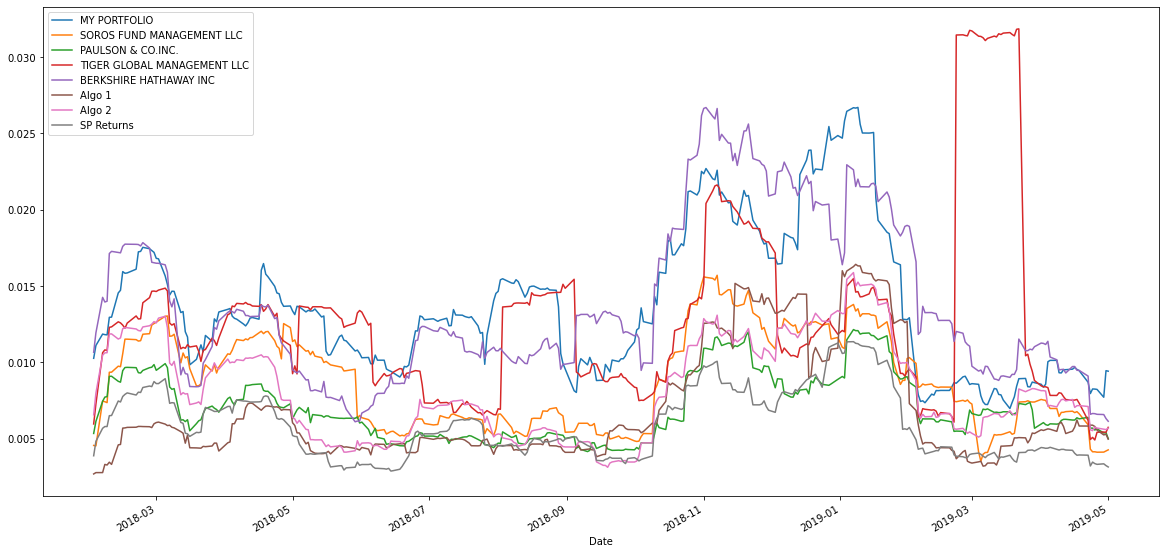

In [158]:
# Calculate and Plot rolling standard deviation

df_new_daily_returns.rolling(window=21).std().plot(figsize=(20,10))



#### Calculate and plot the correlation

In [159]:
# Calculate the correlation

new_correlation = df_new_daily_returns.corr()
new_correlation


,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP Returns
MY PORTFOLIO,1.000000,0.556093,0.385305,0.303971,0.647413,0.214770,0.563756,0.579228
SOROS FUND MANAGEMENT LLC,0.556093,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681
PAULSON & CO.INC.,0.385305,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728
TIGER GLOBAL MANAGEMENT LLC,0.303971,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781
BERKSHIRE HATHAWAY INC,0.647413,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817
Algo 1,0.214770,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789
Algo 2,0.563756,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326
SP Returns,0.579228,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000


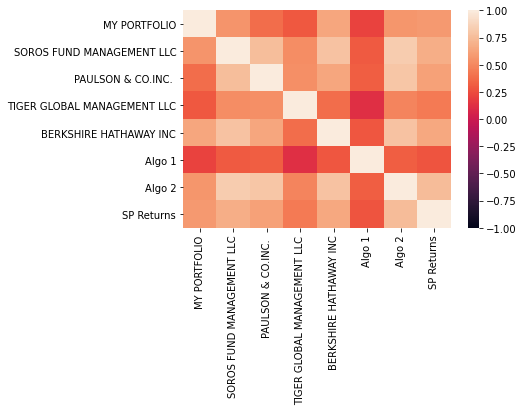

In [160]:
# Display de correlation matrix

import seaborn as sns
sns.heatmap(new_correlation, vmin=-1, vmax=1,)

##### BERKSHIRE HATHWAY INC best mimic the MY PORTFOLIO; since it has the best correlation to MY PORTFOLIO as shown.

In [161]:
correlation_my_portfolio = pd.DataFrame(df_new_daily_returns.corr()).loc[:,"MY PORTFOLIO"]
correlation_my_portfolio[correlation_my_portfolio==correlation_my_portfolio[correlation_my_portfolio<1].max()]

BERKSHIRE HATHAWAY INC    0.647413
Name: MY PORTFOLIO, dtype: float64

#### Calculate and Plot Beta for Your Portfolio compared to the S&P 60 TSX

In [162]:

# Calculate covariance of a single portfolio

new_covariance = df_new_daily_returns['MY PORTFOLIO'].cov(df_new_daily_returns['SP Returns'])
new_covariance

5.111305460230443e-05

In [163]:
# Calculate variance of S&P TSX

new_variance = df_new_daily_returns['SP Returns'].var()
new_variance

3.898788619333669e-05

In [164]:
# Computing beta

MY_PORTFOLIO_beta = new_covariance / new_variance
MY_PORTFOLIO_beta

1.3109983534075265

In [165]:
rolling_new_covariance = df_new_daily_returns['MY PORTFOLIO'].rolling(window=60).cov(df_new_daily_returns['SP Returns'])
rolling_new_variance = df_new_daily_returns['SP Returns'].rolling(window=60).var()

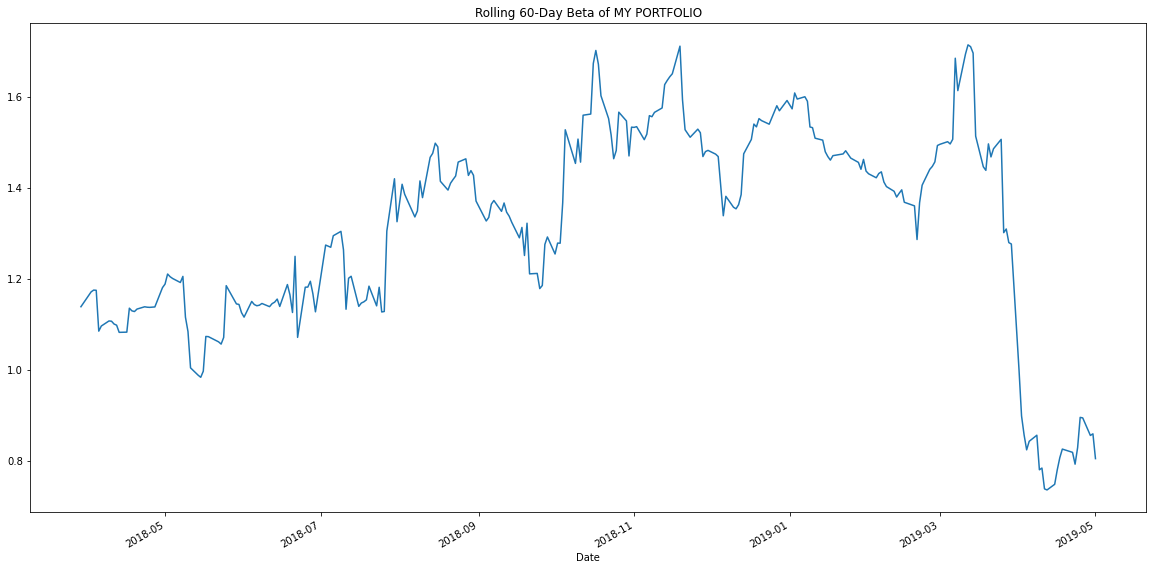

In [166]:
rolling_MY_PORTFOLIO_beta = rolling_new_covariance / rolling_new_variance

# Plot beta trend

rolling_MY_PORTFOLIO_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of MY PORTFOLIO')

#### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [167]:
# Calculate Annualzied Sharpe Ratios

new_sharpe_ratios = df_new_daily_returns.mean()*252/(df_new_daily_returns.std()*np.sqrt(252))
new_sharpe_ratios

MY PORTFOLIO                   1.564547
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
SP Returns                     0.034651
dtype: float64

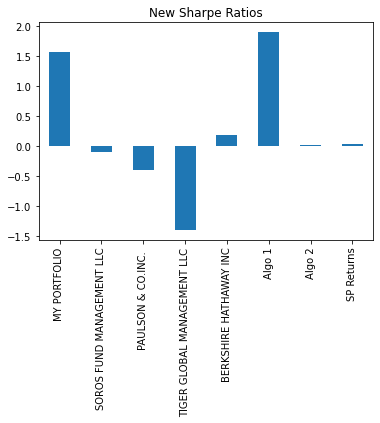

In [168]:
# Visualize the sharpe ratios as a bar plot

new_sharpe_ratios.plot(kind="bar", title="New Sharpe Ratios")

### How does your portfolio do?

##### My portfolio outperforms all other portfolios except Algo 1.